# Visualizing Data with Seaborn (Python Track)

## Introduction

- What is Seaborn?
- Why use Seaborn for data visualization?
- Brief overview of the session

## Setting Up the Environment

In [1]:
# | output: false
# | code-line-numbers: "|6-18|29"
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# from matplotlib import rcParams
# # Set global font properties to Arial
# rcParams.update(
#     {
#         "font.family": "sans-serif",
#         "font.sans-serif": "Arial",
#         "pdf.fonttype": 42,  # Embed fonts as Type 3 fonts for compatibility
#         "ps.fonttype": 42,
#         "text.usetex": False,
#         "svg.fonttype": "none",
#     }
# )


def stardize_columns(df):
    df.columns = [" ".join(col.strip().split()) for col in df.columns]
    # Basic data cleaning
    df["DATE OF OCCURRENCE"] = pd.to_datetime(df["DATE OF OCCURRENCE"])


# Load the data
df = pd.read_csv(
    "https://raw.githubusercontent.com/cauliyang/Visualizing-Data-with-Seaborn/main/data/Crimes_One_year_prior_to_present.csv",
    nrows=1000,
)
stardize_columns(df)

## Understanding the Dataset

In [ ]:
# Exercise: Explore the dataset
# 1. Use df.info() to display basic information about the dataset
# 2. Use df.head() to show the first few rows

# Your code here:


# What insights can you gather from this initial exploration?

data source: https://data.cityofchicago.org/Public-Safety/Crimes-One-year-prior-to-present/x2n5-8w5q/data

## Introduction to Seaborn Plot Types

- Overview of common Seaborn plot types
- When to use each plot type
- Basic syntax and structure
- Complex plot type


## Categorical Plots: Bar Plot 

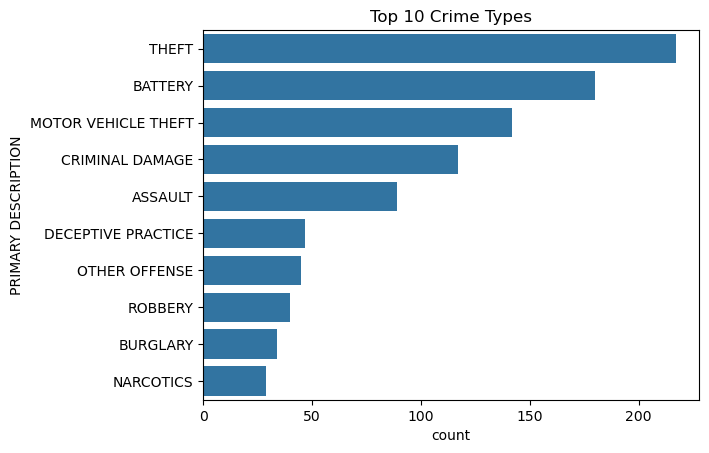

In [2]:
sns.countplot(data=df, y='PRIMARY DESCRIPTION', order=df['PRIMARY DESCRIPTION'].value_counts().index[:10])
plt.title('Top 10 Crime Types')
# sns.despine(offset=10, trim=True) Try that
plt.show()



## Further Exploration 

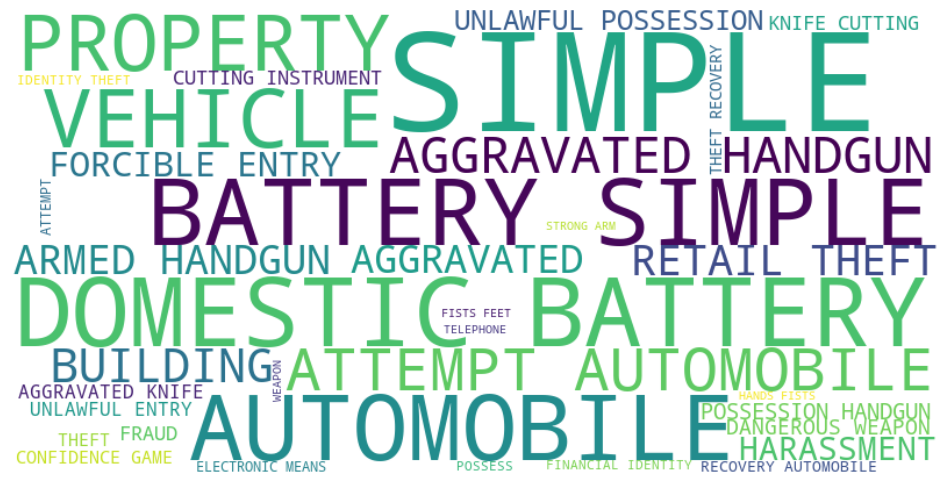

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all secondary descriptions into a single string
text = " ".join(df["SECONDARY DESCRIPTION"].dropna())

# Create and generate a word cloud image
wordcloud = WordCloud(
    width=800, height=400, background_color="white", min_font_size=10
).generate(text)

# Display the generated image
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Distribution Plots: Histogram

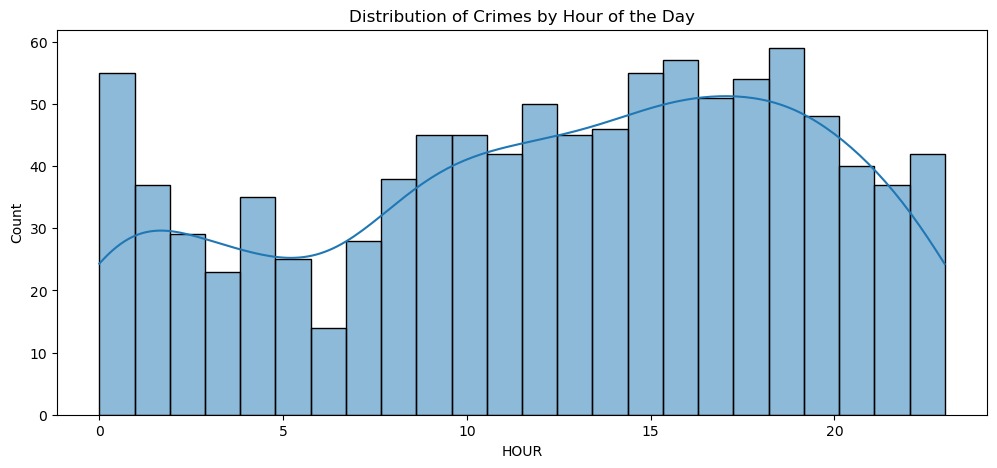

In [4]:
df["HOUR"] = df["DATE OF OCCURRENCE"].dt.hour
plt.figure(figsize=(12, 5))
sns.histplot(data=df, x="HOUR", bins=24, kde=True)
plt.title("Distribution of Crimes by Hour of the Day")
plt.show()

## Distribution Plots: KDE Plot

In [8]:
df['HOUR'].describe()

count    1000.000000
mean       12.436000
std         6.764589
min         0.000000
25%         8.000000
50%        13.000000
75%        18.000000
max        23.000000
Name: HOUR, dtype: float64

/var/folders/s3/vs6nrrg52sdfjk3z90p7ndt94gg4tq/T/ipykernel_15326/3110101864.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x="HOUR", hue="PRIMARY DESCRIPTION", common_norm=False)


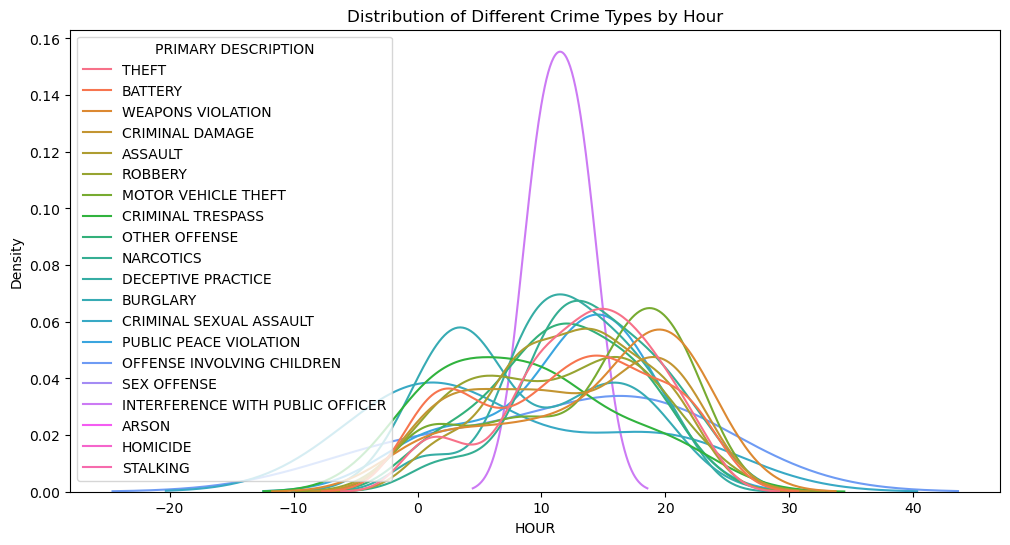

In [12]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x="HOUR", hue="PRIMARY DESCRIPTION", common_norm=False)
plt.title("Distribution of Different Crime Types by Hour")
plt.show()

## Relational Plots: Scatter Plot

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x="LONGITUDE", y="LATITUDE", hue="PRIMARY DESCRIPTION")
plt.title("Geographical Distribution of Crimes")
plt.show()

## Relational Plots: Line Plot

In [ ]:
crime_counts = df.groupby("DATE OF OCCURRENCE").size().reset_index(name="COUNT")
plt.figure(figsize=(10, 5))
sns.lineplot(data=crime_counts, x="DATE OF OCCURRENCE", y="COUNT")
plt.title("Crime Trends Over Time")
plt.xticks(rotation=45)
plt.show()

## Advanced Customization

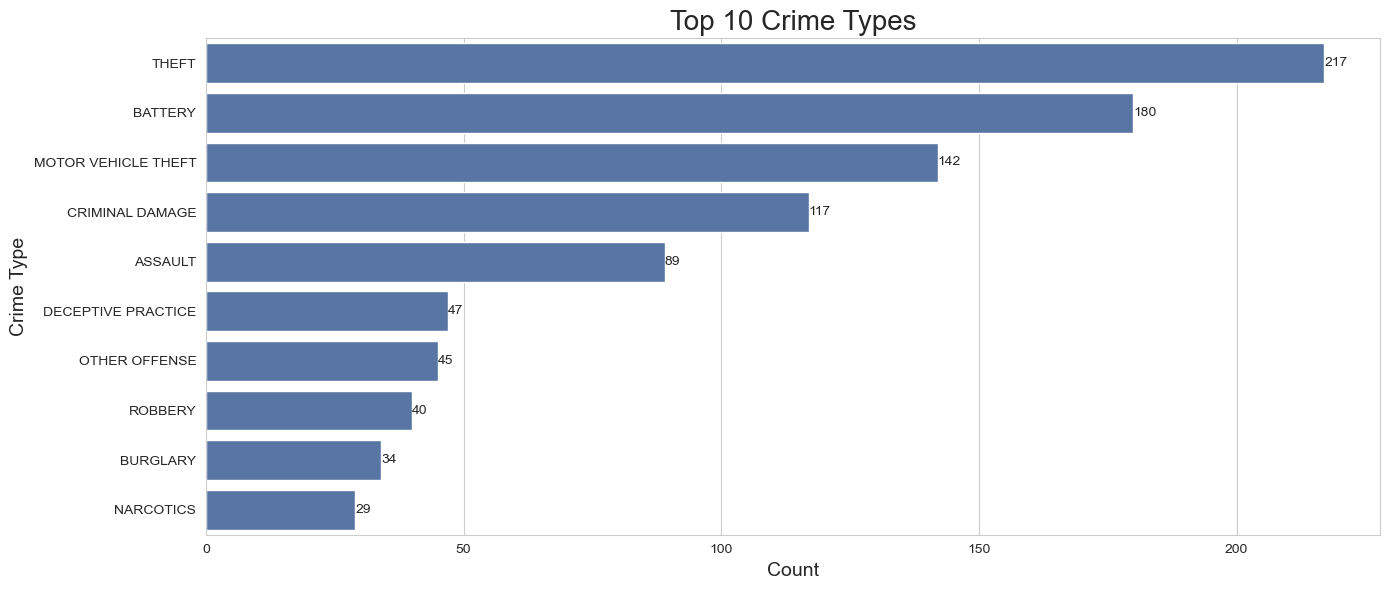

In [16]:
plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")
sns.set_palette("deep")

g = sns.countplot(
    data=df,
    y="PRIMARY DESCRIPTION",
    order=df["PRIMARY DESCRIPTION"].value_counts().index[:10],
)

g.set_title("Top 10 Crime Types", fontsize=20)
g.set_xlabel("Count", fontsize=14)
g.set_ylabel("Crime Type", fontsize=14)

# Seaborn way: Add bar labels
for container in g.containers:
    g.bar_label(container)
# g.bar_label(g.containers[0])

# matplotlib way: Add bar labels
# for i, v in enumerate(df["PRIMARY DESCRIPTION"].value_counts()[:10]):
#     g.text(v + 3, i, str(v), color="black", va="center")
plt.tight_layout()
plt.show()

## Categorical Plots: Box Plot

In [ ]:
df["DAY_OF_WEEK"] = df["DATE OF OCCURRENCE"].dt.day_name()
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x="DAY_OF_WEEK", y="DATE OF OCCURRENCE").set_ylabel("Date")
plt.title("Distribution of Crimes by Day of the Week")
plt.show()


## Categorical Plots: Violin Plot

Now, it's your turn!

In [ ]:
# | output: false

# Exercise: Change the violinplot to a boxenplot
# Hint: Use sns.violinplot()

plt.figure(figsize=(12, 5))
# Your code here:

plt.title("Distribution of Crimes by Day of the Week")
plt.show()

## Categorical Plots: Violin Plot

In [ ]:
#| code-line-numbers: "2"
plt.figure(figsize=(12, 5))
sns.violinplot(data=df, x="DAY_OF_WEEK", y="DATE OF OCCURRENCE").set_ylabel("Date")
plt.show()

## Categorical Plots: enhanced box plot

Now, it's your turn!

In [ ]:
# | output: false

# Exercise: Change the violinplot to a boxenplot
# Hint: Use sns.boxenplot()

plt.figure(figsize=(12, 5))
# Your code here:

plt.title("Distribution of Crimes by Day of the Week")
plt.show()

## Categorical Plots: enhanced box plot

In [ ]:
#| code-line-numbers: "2"
plt.figure(figsize=(12, 5))
sns.boxenplot(data=df, x="DAY_OF_WEEK", y="DATE OF OCCURRENCE").set_ylabel("Date")
plt.show()


## Summary of Categorical Plots

- [boxkenplot](https://seaborn.pydata.org/generated/seaborn.boxenplot.html): Draw an enhanced box plot for larger datasets.
- [boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html): Draw a box plot to show distributions with respect to categories.
- [violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html): Draw a patch representing a KDE and add observations or box plot statistics.
- [stripplot](https://seaborn.pydata.org/generated/seaborn.stripplot.html): Draw a categorical scatterplot using jitter to reduce overplotting.
- [swarmplot](https://seaborn.pydata.org/generated/seaborn.swarmplot.html): Draw a categorical scatterplot with points adjusted to be non-overlapping.



## API Summary 

![](images/function_overview_8_0.png)

## Heatmap

- Useful for visualizing correlation between variables
- Can show patterns and relationships in complex datasets

In [ ]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

# Create heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.xticks(rotation=45, ha="right")
plt.show()

Hint: Try `sns.heatmap()` with `annot=False`.

## Customized Heatmap

Hint: Try `np.tril` instead of `np.triu`.

In [ ]:
#| code-line-numbers: '8'
# Select numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(8, 8))

# Create heatmap with only upper triangle
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    fmt=".2f",
)
plt.xticks(rotation=45, ha="right")
plt.show()

## Pair Plot 

- Useful for exploring relationships between multiple variables
- Creates a grid of scatter plots for each pair of variables

## Pair Plot {.scrollable}

In [ ]:
# Select relevant columns for the pair plot
# Hint: Choose a few relevant columns and use sns.pairplot()
cols_to_plot = ["X COORDINATE", "Y COORDINATE", "LATITUDE", "LONGITUDE"]

# Add hour of day
df["HOUR"] = pd.to_datetime(df["DATE OF OCCURRENCE"]).dt.hour

# Create the pair plot
plt.figure(figsize=(5, 5))
pairplot = sns.pairplot(
    df[cols_to_plot + ["HOUR", "PRIMARY DESCRIPTION"]],
    hue="PRIMARY DESCRIPTION",
    palette="viridis",
    plot_kws={"alpha": 0.6},
    diag_kind="kde",
)
plt.tight_layout()
plt.show()

## Regression Plot

- Visualizes the relationship between two variables
- Includes a linear regression line and confidence interval

In [ ]:
#| code-line-numbers: '1'
sns.lmplot(
    data=df,
    x="BEAT",
    y="WARD",
    col="ARREST",
    row="DOMESTIC",
    height=3,
    aspect=2,
    facet_kws=dict(sharex=False, sharey=False),
    scatter_kws={"alpha": 0.5},
)
plt.show()


Hint: try `seaborn.regplot` or `seaborn.residplot`


## Advanced Seaborn: FacetGrid {.scrollable}

- Demonstrates how to create multiple plots in a grid
- Useful for comparing distributions across categories

In [ ]:
# Create a FacetGrid
plt.figure(figsize=(4, 4))
g = sns.FacetGrid(df, col="PRIMARY DESCRIPTION", col_wrap=3, height=4, aspect=1.5)

# Map a histogram to each subplot
g.map(plt.hist, "HOUR", bins=24)

# Customize the plot
g.set_axis_labels("Hour of Day", "Count")
g.set_titles("{col_name}")
g.fig.suptitle("Distribution of Crimes by Hour for Different Crime Types", y=1.02)
g.tight_layout()
plt.show()


## Seaborn figure styles

In [ ]:
import numpy as np


def sinplot(n=10, flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, n + 1):
        plt.plot(x, np.sin(x + i * 0.5) * (n + 2 - i) * flip)


f = plt.figure(figsize=(6, 6))
gs = f.add_gridspec(2, 2)

with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0, 0])
    sinplot(6)

with sns.axes_style("white"):
    ax = f.add_subplot(gs[0, 1])
    sinplot(6)

with sns.axes_style("ticks"):
    ax = f.add_subplot(gs[1, 0])
    sinplot(6)

with sns.axes_style("whitegrid"):
    ax = f.add_subplot(gs[1, 1])
    sinplot(6)

f.tight_layout()

## Best Practices and Tips

- Choosing the right plot for your data
- Pay attention to color choices and accessibility
- Avoiding common pitfalls
- Consider the story your visualization is telling


## Q&A 

- Q&A session


## Additional resources  Resours 

- https://seaborn.pydata.org
- https://www.data-to-viz.com/
- https://data.cityofchicago.org/Public-Safety/Crimes-One-year-prior-to-present/x2n5-8w5q/data
- https://quarto.org/docs/presentations/revealjs/
- https://seaborn.pydata.org/examples
- https://seaborn.pydata.org/tutorial/color_palettes